# 4.1 선형 회귀

선형 회귀를 훈련시키는 두 가지 방법:
1. 직접 계산할 수 있는 공식을 사용해, 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구한다. (훈련세트에 대해 비용 함수를 최소화하는 모델 파라미터)

2. 경사하강법(GD)이라 불리는 반복적인 최적화 방식을 사용, 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화 시킨다. 

[용어]
모델 파라미터, 
하이퍼파라미터,
비용 함수,
벡터와 행렬,
전치, 점곱, 역행렬, 편미분

# Z-1 Differential Calculus

Math - Differential Calculus (미분)

Calculus is the study of continuous change. It has two major subfields: differential calculus, which studies the rate of change of functions, and integral calculus, which studies the area under the curve. In this notebook, we will discuss the former.

Calculus란 지속적인 변화에 대한 탐구이다. 계산법은 두 가지 서브 필드로 구성이 되는데, 그 중 미분이란 함수의 변화율을 탐구하는 것이고, 적분이란 커브 밑의 면적에 대해 탐구하는 것이다. 해당 노트북에서는 미분에 대해 의논하는 시간을 가질 예정이다.

Differential calculus is at the core of Deep Learning, so it is important to understand what derivatives and gradients are, how they are used in Deep Learning, and understand what their limitations are.

미분 계산법이란 딥 러닝의 핵심이 되므로, 도함수와 기울기가 무엇인지 이해하는 것이 중요하다. 또한 딥 러닝에서 이 두가지 개념이 어떤 식으로 응용되며, 그 한계가 어디인지 알아야 한다.

Note: the code in this notebook is only used to create figures and animations. You do not need to understand how it works (although I did my best to make it clear, in case you are interested).

주의: 이 노트북에 있는 코드는 figure과 animation을 만들기 위해 사용하는 것으로, 해당 코드가 어떻게 작동하는 것인지 완벽하게 이해할 필요는 없다.(그럼에도 혹시나 흥미를 가질 경우를 대비해 최대한 알기 쉽게 설명해 놓았다.)

## Slope of a straight line (직선의 경사)

In [ ]:
#@title
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

What is the slope of the following line?

아래 그래프의 경사는 어떻게 될까?

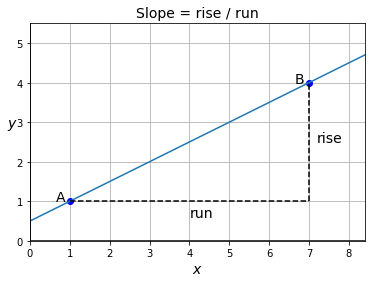

In [ ]:
#@title
def get_AB_line(A_pos, B_pos, x_min=-1000, x_max=+1000):
    rise = B_pos[1] - A_pos[1]
    run = B_pos[0] - A_pos[0]
    slope = rise / run
    offset = A_pos[1] - slope * A_pos[0]
    return [x_min, x_max], [x_min * slope + offset, x_max * slope + offset]

def plot_AB_line(A_pos, B_pos, A_name="A", B_name="B"):
    for point, name in ((A_pos, A_name), (B_pos, B_name)):
        plt.plot(point[0], point[1], "bo")
        plt.text(point[0] - 0.35, point[1], name, fontsize=14)
    xs, ys = get_AB_line(A_pos, B_pos)
    plt.plot(xs, ys)

def plot_rise_over_run(A_pos, B_pos):
    plt.plot([A_pos[0], B_pos[0]], [A_pos[1], A_pos[1]], "k--")
    plt.text((A_pos[0] + B_pos[0]) / 2, A_pos[1] - 0.4, "run", fontsize=14)
    plt.plot([B_pos[0], B_pos[0]], [A_pos[1], B_pos[1]], "k--")
    plt.text(B_pos[0] + 0.2, (A_pos[1] + B_pos[1]) / 2, "rise", fontsize=14)

def show(axis="equal", ax=None, title=None, xlabel="$x$", ylabel="$y$"):
    ax = ax or plt.gca()
    ax.axis(axis)
    ax.grid()
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14, rotation=0)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')

A_pos = np.array([1, 1])
B_pos = np.array([7, 4])
plot_AB_line(A_pos, B_pos)
plot_rise_over_run(A_pos, B_pos)
show([0, 8.4, 0, 5.5], title="Slope = rise / run")

c

## Defining the slope of a curve (곡선의 경사 정의하기)

But what if you want to know the slope of something else than a straight line? For example, let's consider the curve defined by $y = f(x) = x^2$:

그러나, 직선이 아닌 곡선 커브의 기울기를 구하고 싶을 땐 어떻게 애햐 할까? 예를 들면, 이렇게 정의된 곡선을 생각해보자.

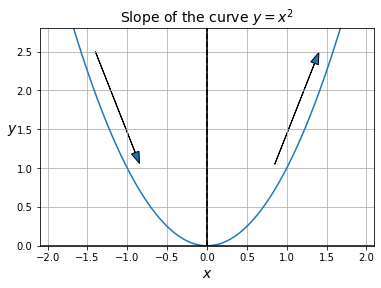

In [ ]:
#@title
xs = np.linspace(-2.1, 2.1, 500)
ys = xs**2
plt.plot(xs, ys)

plt.plot([0, 0], [0, 3], "k--")
plt.arrow(-1.4, 2.5, 0.5, -1.3, head_width=0.1)
plt.arrow(0.85, 1.05, 0.5, 1.3, head_width=0.1)
show([-2.1, 2.1, 0, 2.8], title="Slope of the curve $y = x^2$")

Obviously, the slope varies: on the left (i.e., when $x&lt;0$), the slope is negative (i.e., when we move from left to right, the curve goes down), while on the right (i.e., when $x&gt;0$) the slope is positive (i.e., when we move from left to right, the curve goes up). At the point $x=0$, the slope is equal to 0 (i.e., the curve is locally flat). The fact that the slope is 0 when we reach a minimum (or indeed a maximum) is crucially important, and we will come back to it later.

명백하게, 곡선은 왼쪽에서 감소하고 오른 쪽에서 증가한다. x가 0일 때, 곡선의 기울기는 0과 일치한다. 곡선의 최솟값에 이르렀을 때 기울기가 0이 된다는 사실은 굉장히 중요하며, 나중에 다시 언급하도록 하겠다.

How can we put numbers on these intuitions? Well, say we want to estimate the slope of the curve at a point $\mathrm{A}$, we can do this by taking another point $\mathrm{B}$ on the curve, not too far away, and then computing the slope between these two points:

그렇다면, 어떻게 이런 양상에 수를 집어넣을 수 있을까? 자, 우리가 어느 지점 A에서의 곡선 기울기를 예상하려한다고 가정해보자. 이는 알고자 하는 지점과 멀리 떨어져 있지 않은 다른 B점의 위치를 지정해 기울기를 구함으로서 예상할 수 있다. 

In [ ]:
#@title
def animate_AB_line(f, fp, f_str, x_A, axis=None):
    y_A = f(x_A)
    eps = 1e-4
    x_B_range = 1.5
    x_B = x_A + eps

    n_frames = 200
    text_offset_A = -0.2
    text_offset_B = +0.1
    x_min, x_max = -1000, 1000

    fig, ax = plt.subplots()

    # plot f(x)
    xs = np.linspace(-2.1, 2.1, 500)
    ys = f(xs)
    ax.plot(xs, ys)

    # plot the tangent to the curve at point A
    if fp:
        slope = fp(x_A)
        offset = y_A - slope * x_A
        ax.plot([x_min, x_max], [slope*x_min + offset, slope*x_max + offset],
                "y--")

    # plot the line AB and the labels A and B so they can be animated
    y_A = f(x_A)
    y_B = f(x_B)
    xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
    line_inf, = ax.plot(xs, ys, "-")
    line_AB, = ax.plot([x_A, x_B], [y_A, y_B], "bo-")
    ax.text(x_A + text_offset_A, y_A, "A", fontsize=14)
    B_text = ax.text(x_B + text_offset_B, y_B, "B", fontsize=14)

    # plot the grid and axis labels
    title = r"Slope of the curve $y = {}$ at $x_\mathrm{{A}} = {}$".format(f_str, x_A)
    show(axis or [-2.1, 2.1, 0, 2.8], title=title)

    def update_graph(i):
        x_B = x_A + x_B_range * np.cos(i * 2 * np.pi / n_frames) ** 3
        if np.abs(x_B - x_A) < eps:
            x_B = x_A + eps # to avoid division by 0
        y_B = f(x_B)
        xs, ys = get_AB_line([x_A, y_A], [x_B, y_B])
        line_inf.set_data(xs, ys)
        line_AB.set_data([x_A, x_B], [y_A, y_B])
        B_text.set_position([x_B + text_offset_B, y_B])
        return line_inf, line_AB

    anim = animation.FuncAnimation(fig, update_graph,
                                  init_func=lambda: update_graph(0),
                                  frames=n_frames,
                                  interval=20,
                                  blit=True)
    plt.close()
    return anim

animate_AB_line(lambda x: x**2, lambda x: 2*x, "x^2", -1)


As you can see, when point $\mathrm{B}$ is very close to point $\mathrm{A}$, the $(\mathrm{AB})$ line becomes almost indistinguishable from the curve itself (at least locally around point $\mathrm{A}$). The $(\mathrm{AB})$ line gets closer and closer to the tangent line to the curve at point $\mathrm{A}$: this is the best linear approximation of the curve at point $\mathrm{A}$.

확인할 수 있듯이, B점이 A점과 가까워진다면, 선 AB는 A점 근처에 한해 곡선 커브 자체와 굉장히 유사해진다. 선 AB가 점 A서 탄젠트라인에 점점 가까워지는데, 이것이 점 A에서의 최적 선형 접근이다.

So it makes sense to define the slope of the curve at point $\mathrm{A}$ as the slope that the $\mathrm{(AB)}$ line approaches when $\mathrm{B}$ gets infinitely close to $\mathrm{A}$. This slope is called the derivative of the function $f$ at $x=x_\mathrm{A}$. For example, the derivative of the function $f(x)=x^2$ at $x=x_\mathrm{A}$ is equal to $2x_\mathrm{A}$ (we will see how to get this result shortly), so on the graph above, since the point $\mathrm{A}$ is located at $x_\mathrm{A}=-1$, the tangent line to the curve at that point has a slope of $-2$.

그러므로 점 B가 무한히 점 A에 가까워질 때, 선 AB의 기울기를 점A의 곡선 기울기로서 파악하는 것이 말이 되는 것이다. 해당 기울기는  $f$ at $x=x_\mathrm{A}$의 미분이라고 불린다. 예를 들어 $f(x)=x^2$ at $x=x_\mathrm{A}$의 미분값은 $2x_\mathrm{A}$와 같다. 따라서 위의 그래프는, 점 A 가 $x_\mathrm{A}=-1$ 에 위치해 있으므로 해당 점에서의 곡선의 탄젠트라인은 기울기 -2의 값을 가지는 것이다.

## Differentiability(미분가능성)
Note that some functions are not quite as well-behaved as $x^2$: for example, consider the function $f(x)=|x|$, the absolute value of $x$:

In [ ]:
#@title
animate_AB_line(lambda x: np.abs(x), None, "|x|", 0)

No matter how much you zoom in on the origin (the point at $x=0, y=0$), the curve will always look like a V. The slope is -1 for any $x &lt; 0$, and it is +1 for any $x &gt; 0$, but at $x = 0$, the slope is undefined, since it is not possible to approximate the curve $y=|x|$ locally around the origin using a straight line, no matter how much you zoom in on that point.

The function $f(x)=|x|$ is said to be non-differentiable at $x=0$: its derivative is undefined at $x=0$. This means that the curve $y=|x|$ has an undefined slope at that point. However, the function $f(x)=|x|$ is differentiable at all other points.

In order for a function $f(x)$ to be differentiable at some point $x_\mathrm{A}$, the slope of the $(\mathrm{AB})$ line must approach a single finite value as $\mathrm{B}$ gets infinitely close to $\mathrm{A}$.

This implies several constraints:

First, the function must of course be defined at $x_\mathrm{A}$. As a counterexample, the function $f(x)=\dfrac{1}{x}$ is undefined at $x_\mathrm{A}=0$, so it is not differentiable at that point.
The function must also be continuous at $x_\mathrm{A}$, meaning that as $x_\mathrm{B}$ gets infinitely close to $x_\mathrm{A}$, $f(x_\mathrm{B})$ must also get infinitely close to $f(x_\mathrm{A})$. As a counterexample, $f(x)=\begin{cases}-1 \text{ if }x &lt; 0\\+1 \text{ if }x \geq 0\end{cases}$ is not continuous at $x_\mathrm{A}=0$, even though it is defined at that point: indeed, when you approach it from the negative side, it does not approach infinitely close to $f(0)=+1$. Therefore, it is not continuous at that point, and thus not differentiable either.
The function must not have a breaking point at $x_\mathrm{A}$, meaning that the slope that the $(\mathrm{AB})$ line approaches as $\mathrm{B}$ approaches $\mathrm{A}$ must be the same whether $\mathrm{B}$ approaches from the left side or from the right side. We already saw a counterexample with $f(x)=|x|$, which is both defined and continuous at $x_\mathrm{A}=0$, but which has a breaking point at $x_\mathrm{A}=0$: the slope of the curve $y=|x|$ is -1 on the left, and +1 on the right.
The curve $y=f(x)$ must not be vertical at point $\mathrm{A}$. One counterexample is $f(x)=\sqrt[3]{x}$, the cubic root of $x$: the curve is vertical at the origin, so the function is not differentiable at $x_\mathrm{A}=0$, as you can see in the following animation:

# 4.1 선형 회귀

삶의 만족도=${\theta_0} + {\theta_1}*{\text{1인당 GDP}}$
라는 식이 있을 때, ${\theta_0}$와 ${\theta_1}$이 모델 파라미터다.

선형 모델은 입력 특성의 가중치 합과 편향(절편)이라는 상수를 더해 예측을 만드는데, 아래와 같다.

$\hat{y} = {\theta_0}+{\theta_1}{x_1}+{\theta_2}{x_2}+{\theta_3}{x_3}+...+{\theta_n}{x_n}$

 여기서,
 * $\hat{y}$은 예측값
 * n은 특성의 수
 * ${x_i}$는 i번째 특성 값,
 * ${\theta_j}$ 는 j번째 모델 파라미터다.

위의 식을 벡터 형태로 간략화 한 것이 아래와 같다.
$\hat{y} = {h_{\theta}}(x) = {\theta}*{x} $

* ${\theta}$는 편향 ${\theta_0}, {\theta_1}$ 에서 ${\theta_n}$까지의 특성 가중치를 담은 모델의 파라미터 벡터이다.
* ${x}$ 는 샘플의 특성 벡터이며 ${x_0}$은 항상 1이다.
* ${h_{\theta}}$ 는 모델 파라미터${\theta}$를 사용한 가설 함수이다.


이제 훈련을 시켜보자!

훈련을 시킨다는건 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련데이터에 얼마나 잘 맞는지 측정해야 한다.

회귀에 가장 널리 사용되는 성능 측정 지표는 평균제곱근오차인 RMSE이다. 그러므로 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 ${\theta}$ 의 값을 찾아야 한다. 실제로는 RMSE보다 평균제곱오차인 MSE를 최소화 하는 것이 같은 결과를 내고, 더 간단하기도 하다.

훈련세트 X에 대한 선형회귀가설 ${h_{\theta}}$ 의 MSE는 책과 같이 계산한다.


## 4.1.1 정규방정식

비용함수를 최소화하는 ${\theta}$ 를 찾기 위한 해석적인 방법이 있는데 이게 정규방정식이라는 것이다. 

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [ ]:
# 사이킷런 ≥0.20 필수
import sklearn

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 기울기 3에 절편 4인 함수를 기준으로 점을 랜덤하게 타타타..

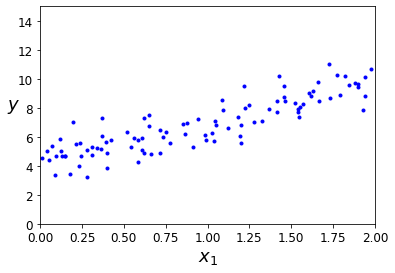

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  

# inv함수는 역행렬 계산,
# dot함수는 행렬 곱셈 하는 함수다.


In [ ]:
theta_best

# 잡음 때문에 깔끔하게 4랑 3이 나오지는 않은...

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

# $\hat{\theta}$으로 예측을 해보자
# 이걸 그래프로 그려보자.

array([[4.21509616],
       [9.75532293]])

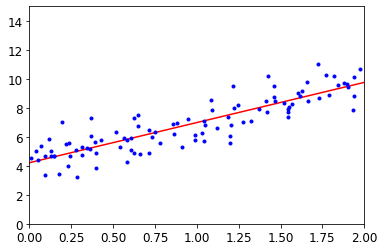

In [ ]:
plt.plot(X_new, y_predict, "r-")  # 빨간 선 그래프
plt.plot(X, y, "b.")  # 점이 마구 있는 그 친구
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 사이킷 런에서 선형 회귀를 수행할 때는 일케 하면 된다.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

In [ ]:
# 유사역행렬 직접 구하기
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## 4.1.2 계산 복잡도
정규방정식은 특성의 개수가 두 배로 늘어나면 계산 시간은 4배가 되는 것이다....

학습된 선형 회귀 모델은 예측이 굉장히 빠른데, 예측 계산 복잡도는 샘플 수 와 특성 수에 선형적 관계를 띈다. 샘플이 2배면 시간도 2배가 증가하는 셈..

# 4.2 경사 하강법

경사하강법(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즙이다. 기본 아이디어는 비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.

예를 들자면  파라미터 벡터${\theta}$에 대해 비용 함수의 현재 gradient를 계산한다. 그리고 gradient가 감소하는 방향으로 진행한다. 그게 0이 되면 최솟값에 도달!!

구체적으로 보면 ${\theta}$를 임의의 값으로 시작(무작위 초기화)해서 한 번에 조금씩 비용함수(MSE 같은)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상 시키는 것이다.

경사하강법에서 중요한 파라미터는 스텝의 크기로, 학습률 하이퍼 파라미터로 결정 된다. 학습률이 너무 작음ㄴ 알고리즘이 수렴하기 위해 반복을 많이 해야하니 시간이 오래 걸린다.

또 너무 크면 곤란함...

게다가 모든 비용 함수가 매끈한 U자형은 아니다. 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면, 전역 최솟값보다 지역 최솟값에 수렴한다. 

선형 회귀를 위한 MSE비용 함수는 곡선에서 어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 블록함수이다. 즉, 전역 최솟값만 있다는 소리...

또, 연속된 함수이고, 기울기가 갑자기 변하지 않는다. 이 경우, 경사하강법은 전역 최솟값에 가깝게 접근할 수 있는 것이다. 

즉 모델 훈련이란 비용 함수를 최소화하는 모델 파라미터의 조합을 찾는 일이라는 거.... 이를 모델의 파라미터 공간에서 찾는다고 말한다. 선형 회귀의 경우 함수가 볼록하므로 최솟값의 위치에서 찾으면 된다.

## 4.2.1 배치 경사 하강법

경사 하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그래디언트(그니까 기울기)를 계산 해야 한다. 즉, 모델 파라미터가 좀 변경이 될 때, 비용 함수가 얼마나 바뀌는지 계산을 해야 한다는 뜻...이걸 "편도함수"라고 한다.

In [ ]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

# 아까 정규방정식으로 구한 것과 일치하며, 작동이 잘 되는 중

array([[4.21509616],
       [2.77011339]])

반복 횟수는 어떻게 지정할까? 

* 너무 작으면: 최적점에 도달하기도 전에 알고리즘이 멈춘다

* 너무 크면: 모델 파라미터가 이제 변하지 않는데 시간을 더 낭비한다

결국 반복 횟수를 아주 크게 지정하고, 그래디언트 벡터가 작아지면(허용 오차보다 작아지면) 경사 하강법이 (거의) 최솟값에 도달한 셈이니 알고리즘을 중지하면 된다.

단, 오차 허용을 줄이면, 줄이는 만큼의 배로 알고리즘의 반복이 늘어날 테고, 그만큼 시간이 걸릴 것이다.

In [ ]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

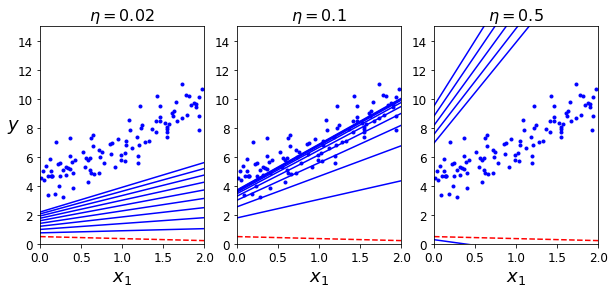

In [ ]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

## 4.2.2 확률적 경사 하강법

배치 경사 하강법의 문제는, 매 스텝마다 전체 훈련 세트를 사용해 그레디언트를 계산한다는거다. 훈련세트가 크면 클수록 느려진다.

반면, 확률적 경사 하강법은 매 스텝에서 한 개의 샘플을 무작위로 선택하고, 그 샘플에 대한 그레디언트를 걔산한다. 즉, 매 반복에서 다룰 데이터가 적으므로, 한 번에 하나의 샘플을 처리하면 알고리즘이 빠르다.

다만, 배치 경사 하강법보다 불안정하다는 것이 단점이다. 비용 함수가 최솟값에 다다를 때까지 부드럽게 감소하지 않고, 요동치며 평균에 수렴하는 식이다. 시간이 지나면 최솟값에 근접 하겠지만...요동이 지속되면서 최솟값에 '안착'하지는 못할 것이다. 

비용 함수가 불규칙할 때, 알고리즘이 지역 최솟값을 건너뛰도록 도와주므로, 확률적 경사 하강법이 배치 경사 하강법보다 전역 최솟값을 찾을 가능성은 높다.

다만 무작위성이라는게 지역 최솟값에서는 탈출을 시켜 주지만, 전역 최솟값에 다다르지 못한다는 점이 단점인데, 학습률을 점진적으로 감소시키면 해결할 수 있다.

시작할 때는 학습률을 크게, 점점 작게 줄여가는 방식으로...n_epochs = 50

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

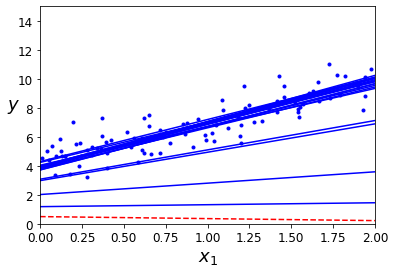

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
plt.show()                                           # 책에는 없음

일반적으로 한 반복에서 훈련 세트에 있는 샘플의 수만큼 되풀이되고, 이 때 각 반복을 '에포크'라고 한다. 

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

# 이전과는 다른 학습 스케줄을 사용해도?

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

# 결과는 정규방정식과 비슷한 값이 나온다.

(array([4.24365286]), array([2.8250878]))

## 4.2.3 미니배치 경사 하강법

각 스텝에서 전체 훈련 세트나, 하나의 샘플을 기반으로 그래디언트를 계산하는게 아니라,

미니배치라 부르는 임의의 작은 샘플 세트에다 그레디언트를 계산하는 것.

확률적 경사 하강법에 비해 미니배치 경사 하강법은 행렬 연산에 최적화된 하드웨어를 사용해서 성능 향상을 얻는다는 점이다.

미니 배치를 어느 정도 크게 하면, 파라미터 공간에서 SGD보다 덜 불규칙하게 움직이며, 최솟값에도 더 가까이 도달한다. (지역 최솟값에서 빠져나오기는 더 힘들지도 모름)

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

NameError: ignored

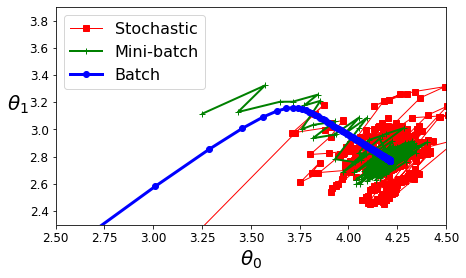

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

이런 방식으로 최솟값에 다다르는걸 볼 수 있다. 모두 최솟값 근처에 도달했으나...

* 배치 경사 하강법은 최솟값 근처에서 맴돌고
* 확률적 경사 하강법과 미니배치는 근처에서 맴돈다.
* 배치는 많은 시간이 소요되고
* 나머지 두 개도 적절한 학습 스케줄이 있어야..^^

# 4.3 다항회귀

Q. 가지고 있는 데이터가 단순 직선보다 복잡한 형태라면? 비선형 데이터를 학습하는 데에도 선형 모델을 사용할 수 있다. 

    -> 각 특성의 거듭제곱을 새로운 특성으로 추가
    -> 확장된 이 특성을 포함한 데이터셋에 선형 모델을 훈련

아래는 예시로, 약간의 잡음이 포함된 2차방정식 비선형 데이터

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # 2차방정식을 코드로 푼 친구

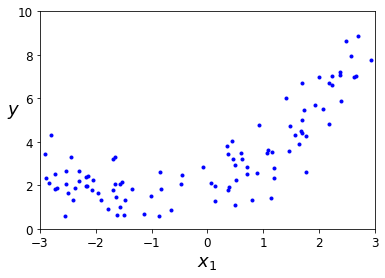

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)   
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

위의 그래프에 직선은 잘 맞지 않을 것이다.

### PolynominalFeatures
이 친구를 써서 훈련 데이터를 변형해보자 (제곱을 해 줄거당)

X_poly 는 원래 특성 X와 이 특성의 제곱을 포함할 것이고, 확장된 이친구에 선형 회귀를 적용해보게따.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)    # inclued_bias가 True이면 편향을 위한 특성 (x0)추가
X_poly = poly_features.fit_transform(X)            # 기존 특성 X에다가 poly_features 적용해줘라(제곱해줘라 그리고 특성 하나 만들어라)

X[0]                                                                 # 그렇게 기존 특성 X의 배열 출력을 해보면~

array([0.62278195])

In [ ]:
X_poly[0]     # 제곱한 특성의 배열을 출력해보면~ (원래 특성, 특성제곱) <- 이런식으로 출력

array([0.62278195, 0.38785736])

In [ ]:
# 이제 선형회귀 적용해볼거당
lin_reg = LinearRegression()  # 일단 이 줄을 써 줌
lin_reg.fit(X_poly, y)                # X_poly랑 기존 y값 가지고 적용해죠라 (출력도 해)
lin_reg.intercept_, lin_reg.coef_    # 인터셉트랑 상관관관계도 출력을 해라

(array([1.95163088]), array([[0.96364196, 0.4388373 ]]))

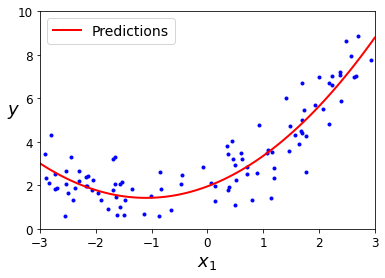

In [ ]:
# X_new를 만들어준다
X_new=np.linspace(-3, 3, 100).reshape(100, 1)     

# poly_reatures가 누구였냐면 특성값에 제곱하고 편향 없는 그 친구
# 걔를 지금 X_new에다가 적용을 해서 X_new_poly라는 새 친구를 만들겠다 이거임
X_new_poly = poly_features.transform(X_new)      

#X_new_poly를 회귀예측해서  y_new를 만들어준다 (얘가 빨간선이 될거얌)
y_new = lin_reg.predict(X_new_poly)

# 아까 점 그래프 찍을 때 쓴 거
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

# 라벨도 붙여주고
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

# 빨간 선이 무슨 친구인지도 써주고
plt.legend(loc="upper left", fontsize=14)

# 아까 점 그래프 값
plt.axis([-3, 3, 0, 10])

# 출력~
plt.show()

호오... 꽤나 일치하는 양상...! 책에서는 나쁘지 않다고 한다. 

특성이 여러개일 때, 다항 회귀는 이 특성들 사이의 관계를 찾을 수 있다. 그리고 일반적인 선형회귀에선 못하지 걔는 특성이 하나니깐... PolynominalFeatures가 주어진 차수(제곱이 얼마나 붙었는지) 까지 특성간의 모든 교차항을 추가하기 때문이당.

degree = 3일 때,

a^2, a^3, b^2, b^3, ab, (a^2)b, (b^2)a  이렇게 출력

# 4.4 학습 곡선

고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 훨씬 더 훈련 데이터에 잘 맞추려 할 것이다.

단순한 선형 모델이나 2차모델과 비교해보자!

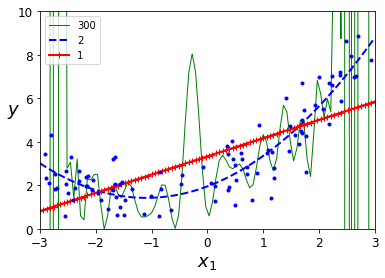

In [ ]:
# 임포트
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)   # polybig_features 적용
    std_scaler = StandardScaler()   # 스케일러
    lin_reg = LinearRegression()     # 선형회귀
    polynomial_regression = Pipeline([   # 어떻게 표시할지
            ("poly_features", polybig_features),  # 파란선 폴리
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),   # 선형회귀(붉은선)
        ])  # 아래는 그래프 그리는거
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)  # 그래프 조건
# 그려라
plt.plot(X, y, "b.", linewidth=3)

# 레전드, 라벨, axis
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

# save_fig("high_degree_polynomials_plot")

#그리기
plt.show()

1. 위의 그래프는 심각하게 훈련 데이터에 과대적합 된 경우이다
2. 반면에 선형 모델은 과소적합이다
3. 일반화가 가장 잘 된 친구는 2차 다항 회귀이다.

2차방정식으로 만든 데이터니까 당연하지만 일반적으로는 어떤 함수로 데이터가 생성된건지 모른다. 그러면 모델을 얼마나 복잡하게 쓸 지는 어떻게 결정하나...??

    -> 2장에선 모델의 일반화 성능을 추정하기 위해 "교차검증"을 사용했지... 훈련 데이터에서 성능이 좋은데 교차 검증 점수가 나쁘면 = 과대적합
    -> 양쪽 다 좋지 않으면 과소적합 
    -> 이 때 모델이 너무 단순하거나 복잡하다고 했다.

다른 방법은 학습 곡선을 살펴보는 거다!!! 

    -> 훈련 세트와 검증세트의 모델 성능을 훈련세트 크기의 함수로 나타내기
    -> 훈련 세트에서 크기가 다른 서브셋을 만들어 모델을 여러번 훈련시킨다
  
다음 코드는 주어진 훈련 데이터에서 모델의 학습곡선을 그리는 함수를 정의한다.


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 학습곡선 함수를 정의 plot_learning_curves
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

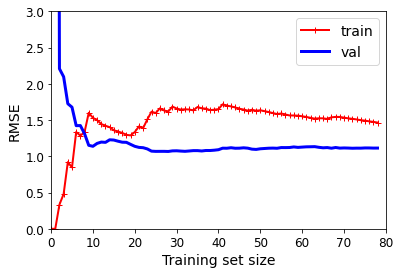

In [ ]:
# 단순 선형 회귀 모델의 학습곡선

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

plt.axis([0, 80, 0, 3])                         # 책에는 없음
plt.show()                                      # 책에는 없음

위의 그래프는 과소적합 사례

<훈련데이터>
* 그래프가 0에서 시작 = 훈련 세트에 1, 2개의 샘플이 잇을 땐 모델이 완벽작동
* 샘플 추가되면 잡음에 비선형이라 모델이 훈련 데이터를 완벽히 학습하는게 불가능
* 그래프 평평해지면서 오차가 상승
* 훈련 셋에 샘플 추가되어도 평균 오차가 그렇게 차이가 안 남 (어느정도 평평)

<검증 데이터>
* 모델 수가 적을 때는 제대로 일반화가 될 수가 읎어서 검증 오차가 초기에 매우 크다
* 훈련 샘플이 추가되면서 학습되고 검증오차 감소한다
* 선형 회귀 직선은 데이터를 잘 모델링 할 수가 없어서 오차 감소가 완만해짐 -> 훈련 세트 그래프와 근사

모델이 훈련 데이터에 과소적합 되어있다면 훈련 샘플을 더 추가해도 효과가 없다. 더 복잡한 모델을 쓰거나 더 나은 특성을 선택해야지...


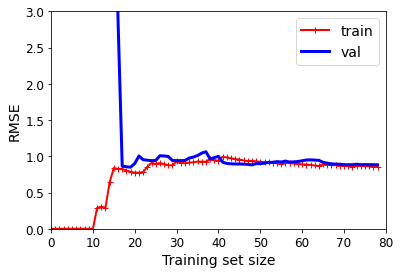

In [ ]:
# 10차 다항회귀 곡선!!!!!

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

plt.axis([0, 80, 0, 3])           # 책에는 없음
# save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음

* 훈련 데이터의오차가 선형 회귀 모델보다 낮..나..? 별로 안 낮은듯
* 두 곡선 사이에 공간도..없...음... ㅎㅎ 괜찮군

과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것이다.

### 편향/분산 트레이트 오프
모델의 일반화 오차는 세 가지 다른 종류의 오차 합으로 표현할 수 있다.

* 편향

 일반화 오차 중에서 편향이란 잘못된 가정으로 인한 것이다. 실제로는 2차 데이터인데 선형으로 가정하면 이렇게 된다.(예시임) 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다. 근데 편향은 여기서 선형 모델의 편향과는 다른 의미이다. 

* 분산

 훈련데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다. 자유도가 높은 모델(고차 다항 회귀모델 같은)이 높은 분산을 가지기 쉬워서 훈련데이터에 과대적합되는 경향이 있다.

* 줄일 수 없는 오차

 데이터 자체에 있는 잡음 때문에 발생한다. 잡음을 제거해야 줄일 수 있는 오차이다...

모델 복잡성이 커지면 통상적으로는 분산이 늘어나고 편향이 줄어든다. 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. 그래서 트레이드 오프 ~